# Self-Driving Car Engineer Nanodegree


## Project: **Advanced Lane Finding** 


### Goals 

1. Compute the camera calibration matrix and distortion coefficients given a set of chessboard images.
2. Apply a distortion correction to raw images.
3. Use color transforms, gradients, etc., to create a thresholded binary image.
4. Apply a perspective transform to rectify binary image ("birds-eye view").
5. Detect lane pixels and fit to find the lane boundary.
6. Determine the curvature of the lane and vehicle position with respect to center.
7. Warp the detected lane boundaries back onto the original image.
8. Output visual display of the lane boundaries and numerical estimation of lane curvature and vehicle position.


### Step-by-Step Examples


<figure>
 <img src="examples/undistort_output.png" width="60%" alt="Distortion Correction" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Distortion Correction </p> 
 </figcaption>
</figure>
 <p></p> 
<figure>
 <img src="examples/binary_combo_example.jpg" width="60%" alt="Binary Combo" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Edge Detection </p> 
 </figcaption>
</figure>
 <p></p> 
<figure>
 <img src="examples/warped_straight_lines.jpg" width="60%" alt="Perspective Transform" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Perspective Transform </p> 
 </figcaption>
</figure>
 <p></p> 
<figure>
 <img src="examples/color_fit_lines.jpg" width="60%" alt="Lane Fitting" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Lane Fitting </p> 
 </figcaption>
</figure>
 <p></p> 
<figure>
 <img src="examples/example_output.jpg" width="60%" alt="Expected Output" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Expected Output </p> 
 </figcaption>
</figure>
 <p></p> 



## IPython Notebook Configuration

In [63]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 1. Camera calibration using chessboard images

Camera Calibration
> Parameters ...
> Setting up ...
> Running calibration on 20 images ...
 - file: camera_cal/calibration18.jpg
 - file: camera_cal/calibration9.jpg
 - file: camera_cal/calibration16.jpg
 - file: camera_cal/calibration14.jpg
 - file: camera_cal/calibration5.jpg
! cv2.findChessboardCorners was not able to process file: camera_cal/calibration5.jpg
 - file: camera_cal/calibration2.jpg
 - file: camera_cal/calibration11.jpg
 - file: camera_cal/calibration3.jpg
 - file: camera_cal/calibration17.jpg
 - file: camera_cal/calibration6.jpg
 - file: camera_cal/calibration7.jpg
 - file: camera_cal/calibration10.jpg
 - file: camera_cal/calibration19.jpg
 - file: camera_cal/calibration1.jpg
! cv2.findChessboardCorners was not able to process file: camera_cal/calibration1.jpg
 - file: camera_cal/calibration4.jpg
! cv2.findChessboardCorners was not able to process file: camera_cal/calibration4.jpg
 - file: camera_cal/calibration20.jpg
 - file: camera_cal/calibration13.jpg
 - file: cam

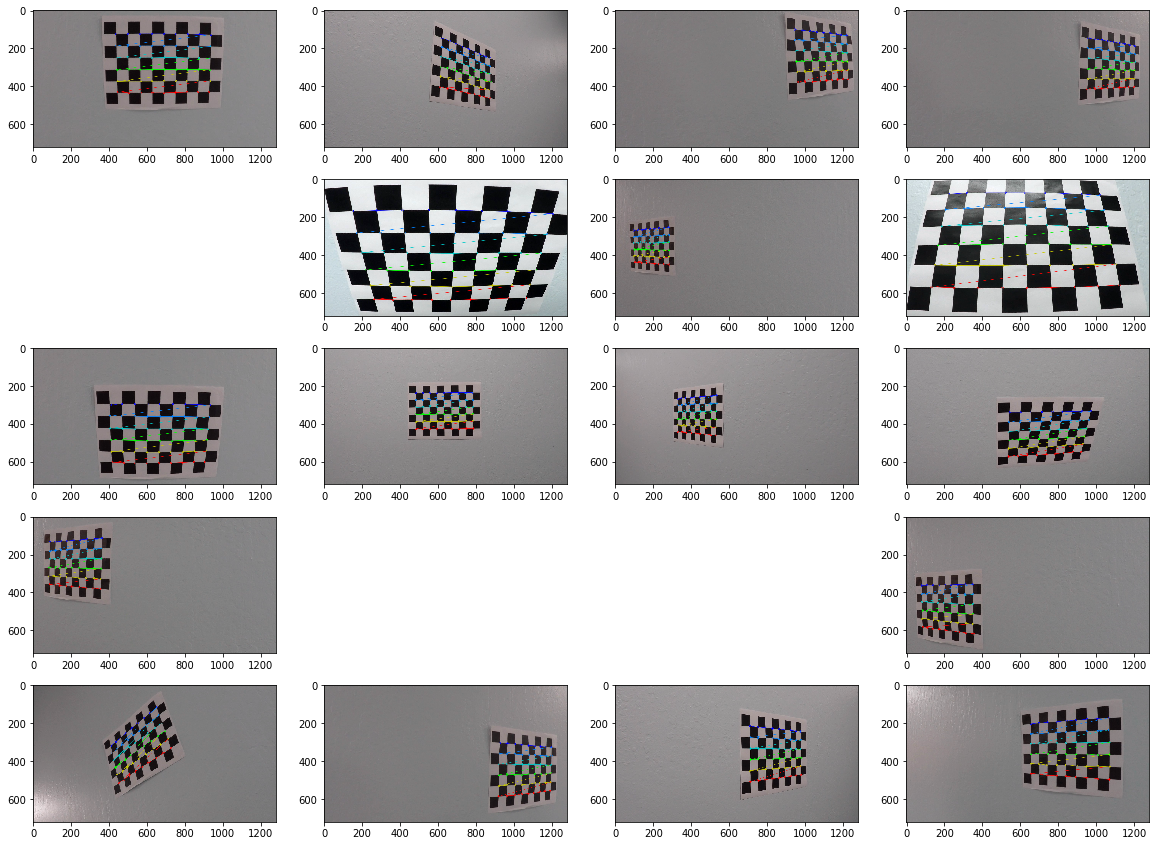

In [35]:
import pickle
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt

print("Camera Calibration")
print("==================")
print("> Parameters ...")
nx = 9
ny = 6
display_calibration = True

print("> Setting up ...")
# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((nx*ny,3), np.float32)
objp[:,:2] = np.mgrid[0:nx,0:ny].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d points in real world space
imgpoints = [] # 2d points in image plane.

# Make a list of calibration images
images = glob.glob('camera_cal/calibration*.jpg')

if display_calibration:
    fig = plt.figure(1, figsize=(20, 15))

# Step through the list and search for chessboard corners
print("> Running calibration on %d images ..." % len(images))
cnt = 0
for fname in images:
    print(' - file: ' + fname)
    cnt = cnt + 1
    
    # Read grayscale
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (nx,ny),None)

    # If found, save object points, image points
    if ret == True:
        objpoints.append(objp)
        imgpoints.append(corners)

        # Draw and display the corners
        if display_calibration:
            img = cv2.drawChessboardCorners(img, (nx,ny), corners, ret)
            fig.add_subplot(5, 4, cnt)
            plt.imshow(img)
    else:
        print ('! cv2.findChessboardCorners was not able to process file: %s' % fname)

calibration_fname = "pickle/calibration.p"
print("> Creating pickle file: %s" % calibration_fname)
data = dict()
data['objpoints'] = objpoints
data['imgpoints'] = imgpoints
pickle.dump(data, open(calibration_fname, "wb" ) )

print("> Calibration Completed")

## 2. Distortion Correction

> Get Camera Calibration Parameters for sample image (assume size w=1280, h=720)
> Correct Distortion on sample images:
 - file: camera_cal/calibration1.jpg
 - file: camera_cal/calibration2.jpg
 - file: camera_cal/calibration3.jpg
 - file: camera_cal/calibration4.jpg
> Creating pickle file: pickle/distortion.p
> Distortion Correction Completed


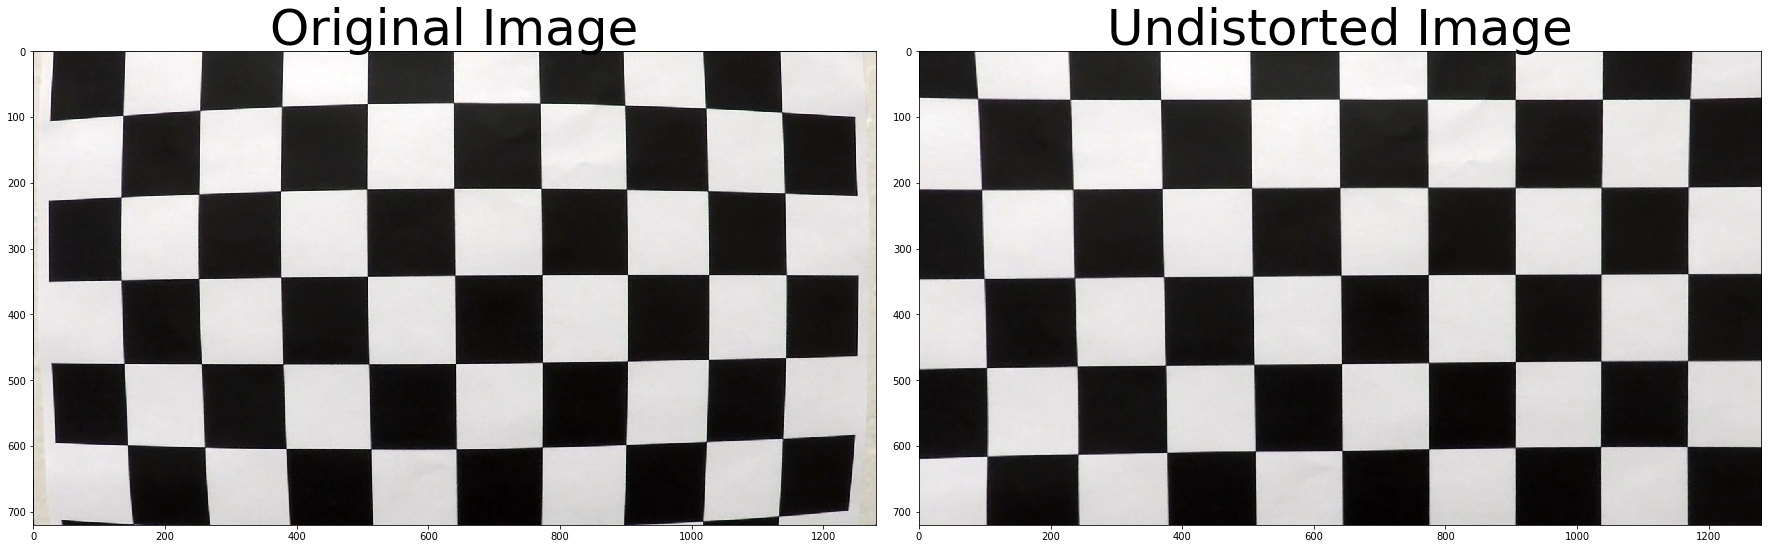

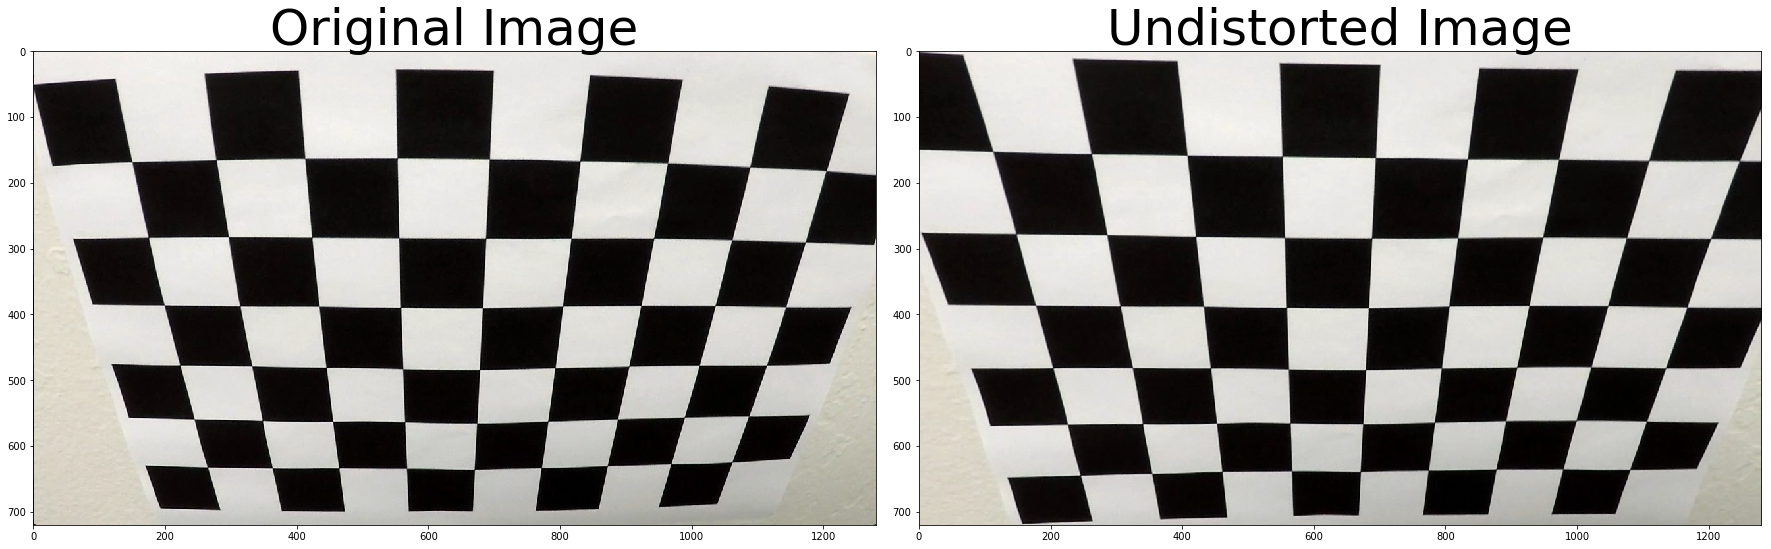

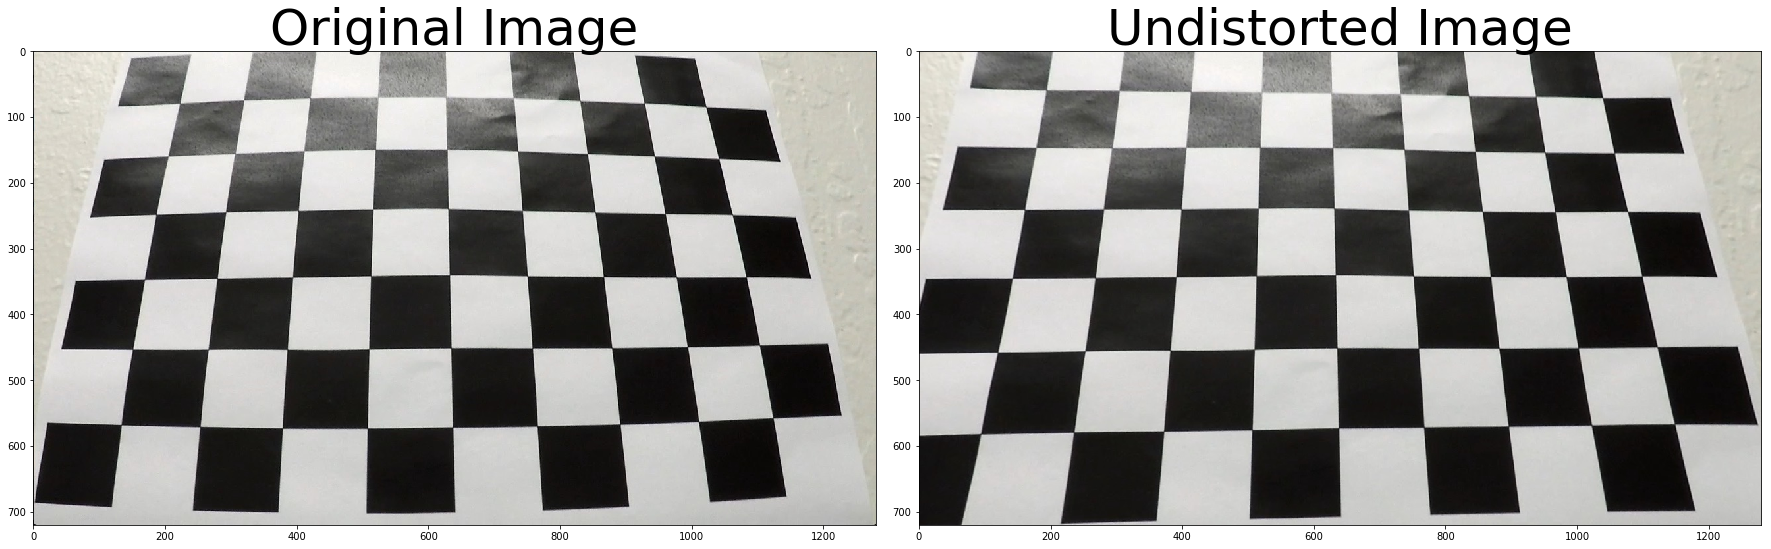

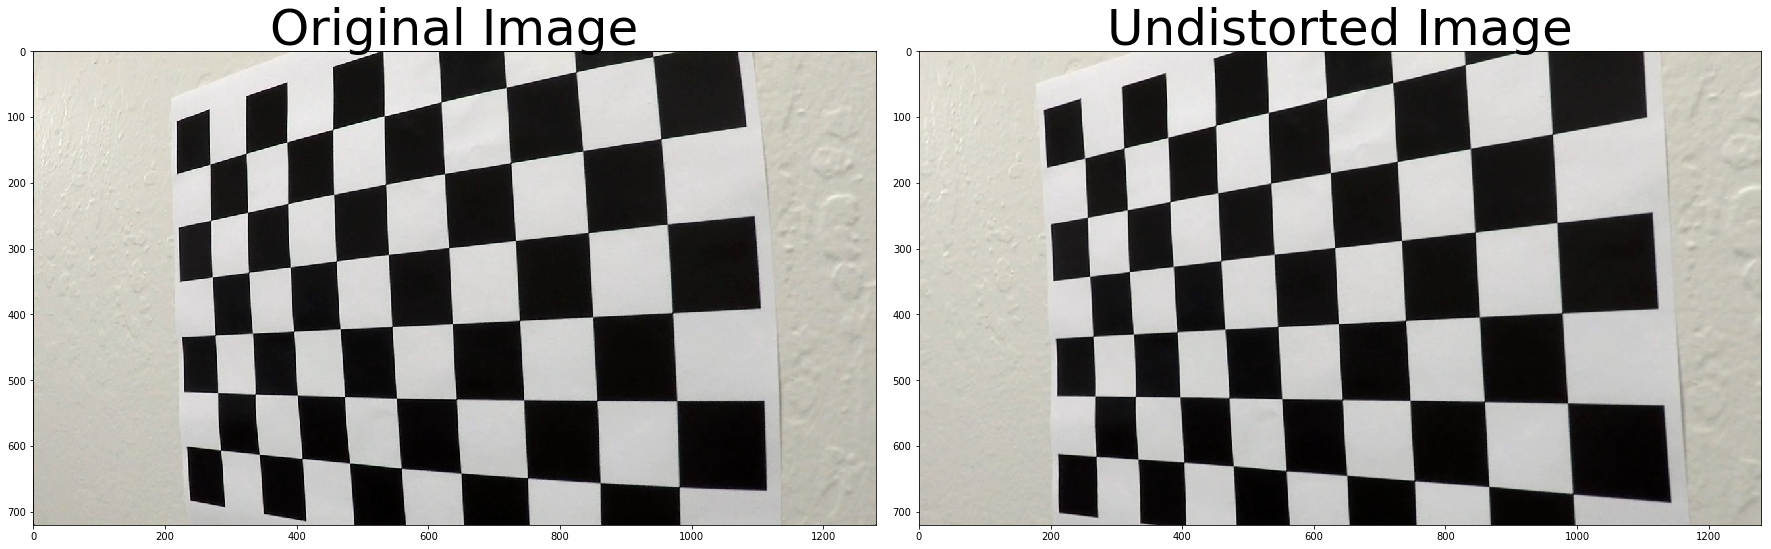

In [65]:
# Load Calibration Data
calibration_fname = "pickle/calibration.p"
calibration_data = pickle.load( open(calibration_fname, "rb" ) )
objpoints = calibration_data["objpoints"]
imgpoints = calibration_data["imgpoints"]

# Parameters
display_distortion_correction = True

# Camera Calibration Parameters (assume same all of size)
def get_calibration_parameters(objpoints, imgpoints, w, h):
    [_, mtx, dist, _, _] = cv2.calibrateCamera(objpoints, imgpoints, (w, h), None, None)
    return mtx, dist

# Make a list of test images
#   Here I selected some chessboard images, were the distortion 
#   correction is notorious.
images = [
    'camera_cal/calibration1.jpg',
    'camera_cal/calibration2.jpg',
    'camera_cal/calibration3.jpg',
    'camera_cal/calibration4.jpg',
]

print("> Get Camera Calibration Parameters for sample image (assume size w=%d, h=%d)" % (w, h))
img = cv2.imread(images[0])
w = img.shape[1]
h = img.shape[0]
[mtx, dist] = get_calibration_parameters(objpoints, imgpoints, w, h)

# Display Undistorted Image Comparison
if display_distortion_correction:
    print("> Correct Distortion on sample images:")
    for fname in images:
        print(' - file: ' + fname)

        # Read grayscale
        img_ = cv2.imread(fname)
        img = cv2.cvtColor(img_, cv2.COLOR_BGR2RGB)

        # Apply distortion correction
        w = img.shape[1]
        h = img.shape[0]
        [mtx, dist] = get_calibration_parameters(objpoints, imgpoints, w, h)
        undistorted = cv2.undistort(img, mtx, dist, None, mtx)

        # Display Comparison
        f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
        f.tight_layout()
        ax1.imshow(img)
        ax1.set_title('Original Image', fontsize=50)
        ax2.imshow(undistorted)
        ax2.set_title('Undistorted Image', fontsize=50)
        plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)


# Unless all images are the same size, the is nothing to record here!
# The only outcome of this section is the undistort() function.
distortion_fname = "pickle/distortion.p"
print("> Creating pickle file: %s" % distortion_fname)
data = dict()
data['h'] = h
data['w'] = w
data['mtx'] = mtx
data['dist'] = dist
pickle.dump(data, open(distortion_fname, "wb" ))

print("> Distortion Correction Completed")